In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


#  读入数据


In [2]:
data_train = pd.read_csv('train.csv') #自动将第一行视为列名
data_test = pd.read_csv('test.csv')
print 'data_train:'
print data_train.columns
print 'data_test:'
print data_test.columns

data_train:
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
data_test:
Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


# EDA

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data_train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.shape

(891, 12)

In [6]:
data_train.drop_duplicates()
data_train.shape

(891, 12)

In [7]:
import numpy as np
X_train = data_train.iloc[:,[1,2,4,5,6,7,9,10,11]]
X_test = data_test.iloc[:,[1,3,4,5,6,8,9,10]]

In [8]:
X_train.dtypes
X_test.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
X_train.isnull().any()#缺失值
X_test.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [10]:
X_train.apply(lambda x:sum(x.isnull()))
X_test.apply(lambda x:sum(x.isnull()))

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survived：是否幸存

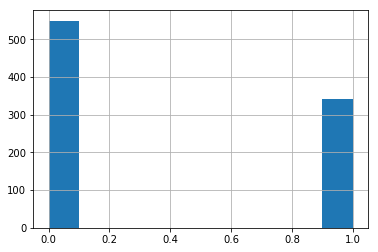

In [12]:
X_train['Survived'].hist()

### Pclass：社会阶层

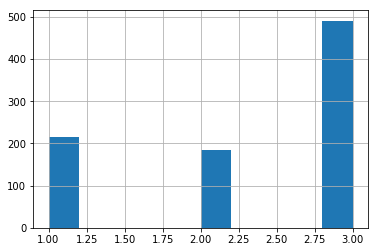

In [13]:
X_train['Pclass'].hist()

### Sex：性别

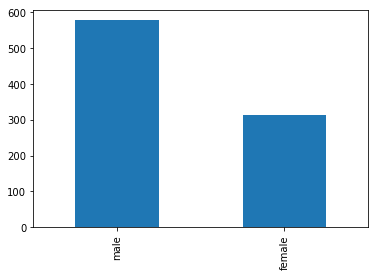

In [14]:
X_train['Sex'].value_counts().plot(kind = 'bar')

### Age：年龄

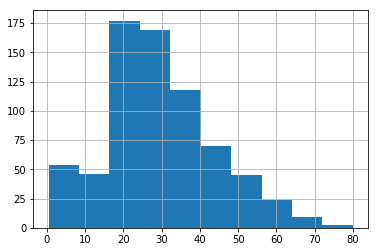

In [15]:
X_train['Age'].hist()

In [16]:
age_mean = int(X_train['Age'].mean())
X_train['Age'].fillna(age_mean,inplace = True)
X_test['Age'].fillna(age_mean,inplace = True)

/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


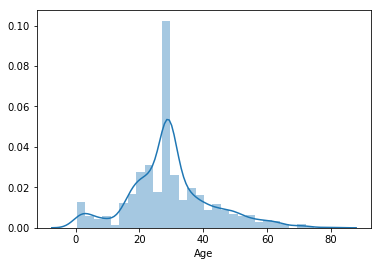

In [17]:
sns.distplot(X_train['Age'])

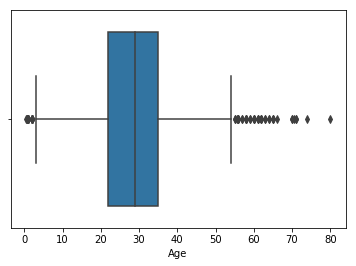

In [18]:
sns.boxplot(X_train['Age'])

In [19]:
#X_train['Age'] = pd.cut(X_train['Age'],bins = [20,40,np.inf])

### SibSp：兄弟姐妹配偶

In [20]:
X_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

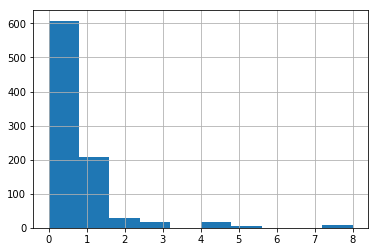

In [21]:
X_train['SibSp'].hist()

### Parch：父母子女

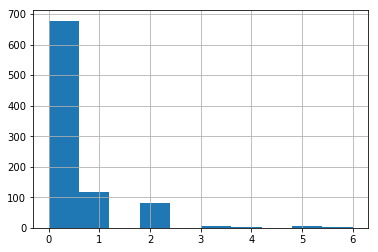

In [22]:
X_train['Parch'].hist()

### Fare：票价

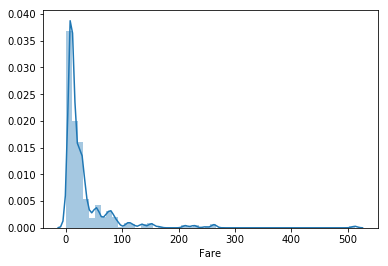

In [23]:
sns.distplot(X_train['Fare'])

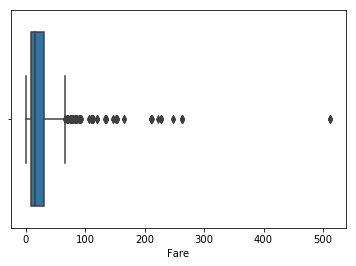

In [24]:
sns.boxplot(X_train['Fare'])

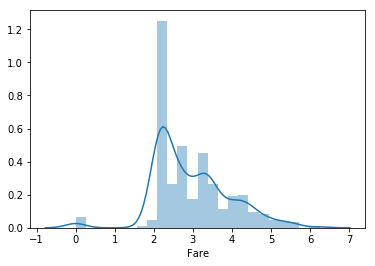

In [25]:
from numpy import log1p
sns.distplot(log1p(X_train['Fare']))

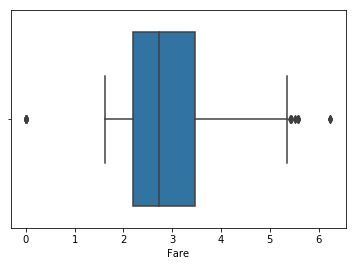

In [26]:
sns.boxplot(log1p(X_train['Fare']))

In [88]:
fare_mean = int(X_train['Fare'].mean())
X_test['Fare'].fillna(fare_mean,inplace = True)

In [27]:
X_train['Fare'] = log1p(X_train['Fare'])
X_test['Fare'] = log1p(X_test['Fare'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Cabin：座舱号

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


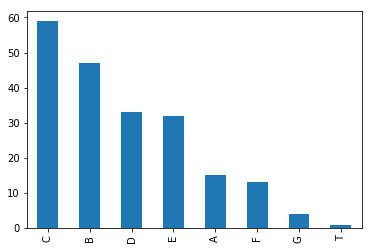

In [28]:
X_train['Cabin'] = X_train['Cabin'].map(lambda x:x[0] if x is not np.nan else x)
X_train['Cabin'].value_counts().plot(kind = 'bar')

In [29]:
X_train['Cabin'].describe()

count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

In [30]:
sum(X_train['Cabin'].isnull())

687

缺失值过多，考虑舍弃这个特征

In [31]:
X_train.drop('Cabin',axis = 1,inplace = True)
X_test.drop('Cabin',axis = 1,inplace = True)
X_train.columns

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Index([u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Embarked'],
      dtype='object')

### Embarked：登船站

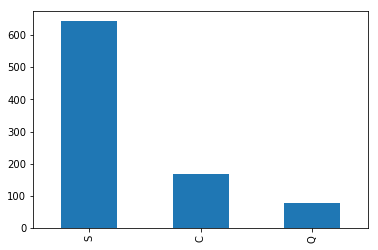

In [32]:
X_train['Embarked'].value_counts().plot(kind = 'bar')

In [33]:
X_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [34]:
sum(X_train['Embarked'].isnull())

2

In [35]:
from scipy.stats import mode
em_mod = mode(X_train['Embarked']).mode[0]
X_train['Embarked'].fillna(em_mod,inplace = True)
X_test['Embarked'].fillna(em_mod,inplace = True)

/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


#### 统一处理类别变量

In [36]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


In [37]:
X_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.560236,0.523008,0.381594,2.962246
std,0.486592,0.836071,13.005010,1.102743,0.806057,0.969048
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,29.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,35.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [41]:
from sklearn.preprocessing import LabelBinarizer
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


In [42]:
from sklearn.preprocessing import LabelBinarizer
tran1 = LabelBinarizer().fit(X_train['Sex'])
tran2 = LabelBinarizer().fit(X_train['Embarked'])

from sklearn.externals import joblib
joblib.dump(X_train,'X.pkl',compress=3)


In [68]:
X_train = joblib.load('X.pkl')
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.110213,S
1,1,1,female,38.0,1,0,4.280593,C
2,1,3,female,26.0,0,0,2.188856,S
3,1,1,female,35.0,1,0,3.990834,S
4,0,3,male,35.0,0,0,2.202765,S


In [69]:
X_train[['Sex']] = pd.DataFrame(tran1.transform(X_train['Sex']))
X_train[['Embarked_0','Embarked_1','Embarked_2']]= pd.DataFrame(tran2.transform(X_train['Embarked']))
X_train.drop('Embarked',axis=1,inplace=True)
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,2.110213,0,0,1
1,1,1,0,38.0,1,0,4.280593,1,0,0
2,1,3,0,26.0,0,0,2.188856,0,0,1
3,1,1,0,35.0,1,0,3.990834,0,0,1
4,0,3,1,35.0,0,0,2.202765,0,0,1


In [70]:
X_test[['Sex']] = pd.DataFrame(tran1.transform(X_test['Sex']))
X_test[['Embarked_0','Embarked_1','Embarked_2']]= pd.DataFrame(tran2.transform(X_test['Embarked']))
X_test.drop('Embarked',axis=1,inplace=True)
X_test.head()

/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,2.178064,0,1,0
1,3,0,47.0,1,0,2.079442,0,0,1
2,2,1,62.0,0,0,2.369075,0,1,0
3,3,1,27.0,0,0,2.268252,0,0,1
4,3,0,22.0,1,1,2.586824,0,0,1


In [71]:
y_train = X_train['Survived']
X_train.drop('Survived',axis=1,inplace=True)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,3,1,22.0,1,0,2.110213,0,0,1
1,1,0,38.0,1,0,4.280593,1,0,0
2,3,0,26.0,0,0,2.188856,0,0,1
3,1,0,35.0,1,0,3.990834,0,0,1
4,3,1,35.0,0,0,2.202765,0,0,1


In [72]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,2.178064,0,1,0
1,3,0,47.0,1,0,2.079442,0,0,1
2,2,1,62.0,0,0,2.369075,0,1,0
3,3,1,27.0,0,0,2.268252,0,0,1
4,3,0,22.0,1,1,2.586824,0,0,1


#### 标准化

In [40]:
"""
from sklearn import preprocessing
s = preprocessing.StandardScaler()
X = pd.DataFrame(s.fit_transform(X))
X.head()
"""

'\nfrom sklearn import preprocessing\ns = preprocessing.StandardScaler()\nX = pd.DataFrame(s.fit_transform(X))\nX.head()\n'

## 特征工程

### filter

方差

In [41]:
from sklearn.feature_selection import VarianceThreshold
a = VarianceThreshold().fit(X)

In [42]:
a.variances_

array([  6.98230591e-01,   1.68940473e+02,   1.21467827e+00,
         6.48999031e-01,   9.38000617e-01,   2.28218083e-01,
         2.28218083e-01,   1.53000261e-01,   7.89513794e-02,
         1.99362373e-01])

单变量

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
a = SelectKBest(f_classif).fit(X,y)
a.scores_

array([  1.15031272e+02,   4.10714781e+00,   1.11057220e+00,
         5.96346384e+00,   1.08541519e+02,   3.72405724e+02,
         3.72405724e+02,   2.58959870e+01,   1.18463440e-02,
         2.03744599e+01])

In [44]:
a.pvalues_

array([  2.53704739e-25,   4.30004011e-02,   2.92243929e-01,
         1.47992454e-02,   4.64667029e-24,   1.40606613e-69,
         1.40606613e-69,   4.39715133e-07,   9.13353235e-01,
         7.22324098e-06])

基于树模型

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X,y)
clf.feature_importances_

array([ 0.05850859,  0.32801247,  0.05063146,  0.01661625,  0.37346626,
        0.08261362,  0.05937842,  0.00481028,  0.01059135,  0.01537131])

In [46]:
SelectFromModel(clf).fit_transform(X, y)

array([[ 22.        ,   2.1102132 ],
       [ 38.        ,   4.28059312],
       [ 26.        ,   2.18885633],
       ..., 
       [ 29.        ,   3.19663022],
       [ 26.        ,   3.4339872 ],
       [ 32.        ,   2.1690537 ]])

## 持久化

In [73]:
from sklearn.externals import joblib
joblib.dump(X_train,'X_train.pkl',compress=3)
joblib.dump(X_test,'X_test.pkl',compress=3)
joblib.dump(y_train,'y_train.pkl',compress=3)

['y_train.pkl']

In [74]:
X_train = joblib.load('X_train.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl') 

In [78]:
y_test = pd.read_csv('gender_submission.csv')
y_test.drop('PassengerId',axis=1,inplace=True)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


True

## 模型训练与验证

In [79]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [100]:
def method(f,param):
    start = time.time()
    
    clf = GridSearchCV(estimator= f,param_grid = param)
    clf.fit(X_train, y_train)
    
    print 'clf.best_params_:'
    print clf.best_params_
    #print clf.best_score_
    print 'clf:'
    print clf
    
    result = clf.predict(X_test)
    score = clf.score(X_test,y_test)
    print 'score:'
    print score
    
    print(classification_report(y_test,result))
    
    print(confusion_matrix(y_test,result))
    
    end = time.time()
    print 'time:%d s' % (end-start)
    
    return clf,result

### LDA

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
f = LinearDiscriminantAnalysis()
param = dict(solver = ['lsqr','svd'])
clf,result = method(f,param)

clf.best_params_:
{'solver': 'lsqr'}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['lsqr', 'svd']}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)
score:
0.961722488038
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       266
          1       0.94      0.96      0.95       152

avg / total       0.96      0.96      0.96       418

[[256  10]
 [  6 146]]
time:0 s


### KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier()
param = dict(n_neighbors=range(3,10))
clf,result = method(f,param)

clf.best_params_:
{'n_neighbors': 9}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.715311004785
             precision    recall  f1-score   support

          0       0.75      0.82      0.79       266
          1       0.63      0.53      0.58       152

avg / total       0.71      0.72      0.71       418

[[218  48]
 [ 71  81]]
time:0 s


### 逻辑回归

In [103]:
from sklearn.linear_model import LogisticRegression
f = LogisticRegression()
param = dict(penalty = ['l1','l2'])
#print param
clf,result = method(f,param)

clf.best_params_:
{'penalty': 'l2'}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)
score:
0.923444976077
             precision    recall  f1-score   support

          0       0.96      0.92      0.94       266
          1       0.87      0.93      0.90       152

avg / total       0.93      0.92      0.92       418

[[244  22]
 [ 10 142]]
time:0 s


### SVM

In [104]:
from sklearn.svm import SVC
f = SVC()
param = dict(C = [i/10.0 for i in range(1,11)])
clf,result = method(f,param)

clf.best_params_:
{'C': 0.9}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.846889952153
             precision    recall  f1-score   support

          0       0.89      0.87      0.88       266
          1       0.78      0.80      0.79       152

avg / total       0.85      0.85      0.85       418

[[232  34]
 [ 30 122]]
time:0 s


### 决策树

In [111]:
from sklearn.tree import DecisionTreeClassifier
f = DecisionTreeClassifier()
param = dict(max_depth = range(1,20),min_samples_split = range(2,20),min_samples_leaf = range(1,20))
clf,result = method(f,param)

clf.best_params_:
{'min_samples_split': 2, 'max_depth': 3, 'min_samples_leaf': 11}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.971291866029
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       266
          1       0.9

### 贝叶斯

In [106]:
from sklearn.naive_bayes import GaussianNB
f = GaussianNB()
param = {}
clf,result = method(f,param)

clf.best_params_:
{}
clf:
GridSearchCV(cv=None, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.870813397129
             precision    recall  f1-score   support

          0       0.98      0.82      0.89       266
          1       0.75      0.97      0.84       152

avg / total       0.89      0.87      0.87       418

[[217  49]
 [  5 147]]
time:0 s


### 随机森林

In [107]:
from sklearn.ensemble import RandomForestClassifier
#f = RandomForestClassifier(min_samples_split= 2, max_depth = 4, min_samples_leaf = 7)
f = RandomForestClassifier()
param = dict(n_estimators = range(10,200,10))
clf,result = method(f,param)

clf.best_params_:
{'n_estimators': 60}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.815789473684
             precision    recall  f1-score   support

          0       0.86      0.85      0.85       266
          1       0.75      0.75      0.75       152

avg / total       0.82      0.82      0.82       418

[[227  39]
 [ 38 114]]
time:21 s


### adaboost

In [108]:
from sklearn.ensemble import AdaBoostClassifier
f = AdaBoostClassifier()
param = dict(n_estimators = range(10,200,10))
clf,result = method(f,param)

clf.best_params_:
{'n_estimators': 80}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.918660287081
             precision    recall  f1-score   support

          0       0.94      0.93      0.94       266
          1       0.88      0.89      0.89       152

avg / total       0.92      0.92      0.92       418

[[248  18]
 [ 16 136]]
time:14 s


### GBDT

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
f = GradientBoostingClassifier()
param = dict(n_estimators = range(10,200,10))
clf,result = method(f,param)

clf.best_params_:
{'n_estimators': 120}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.897129186603
             precision    recall  f1-score   support

          0       0.90      0.94      0.92       266
          1       0.89      0.82      0.85       152

avg / total       0.90      0.90      0.90   

### xgboost

In [110]:
import xgboost as xgb
f = xgb.XGBClassifier()
param = dict(n_estimators = range(10,200,10))
clf,result = method(f,param)

clf.best_params_:
{'n_estimators': 30}
clf:
GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
score:
0.911483253589
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       266
          1       0.93      0.82      0.87       152

avg / total       0.91      0.91      0.91       418

[[257   9]
 [ 28 124]]
time:2 s


### 结果

In [113]:
result = pd.DataFrame(result)
result.to_csv('result.csv')

In [114]:
result.head()

,0
0,0
1,1
2,0
3,0
4,1
